# Introduction à pandas

[pandas](https://pandas.pydata.org/) propose une structure de données à base de tableaux et des opérations associées optimisée pour l'analyse de données en Python. Cette structure analogue aux *data frames* du langage R est codée en Python autour des structures numpy.

Les possibilités de `pandas` sont immenses et on trouvera de nombreuses introductions exhaustives en ligne. [(1)](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) [(2)](https://bitbucket.org/hrojas/learn-pandas) [(3)](https://www.dataquest.io/blog/pandas-python-tutorial/)

Une fois l'outil compris, les indispensables :
 - la documentation officielle de [pandas](http://pandas.pydata.org/pandas-docs/stable/);
 - cette feuille récapitulative [ici](https://github.com/kailashahirwar/cheatsheets-ai/raw/master/PDFs/Pandas.pdf).

Nous avons pris le parti ici de présenter cet outil autour d'une petite étude de cas. Dans le cadre du programme d'[ouverture des données](https://www.data.gouv.fr/fr/), le gouvernement impose à tous les distributeurs de carburants de publier leurs tarifs à chaque mise à jour. On trouvera alors [ici](https://www.prix-carburants.gouv.fr/) une interface qui donne accès à ces données, également téléchargeable sour forme d'archive (au format XML).

Nous avons alors transformé ce fichier XML en deux fichiers CSV, un contenant les [mises à jour de tarifs](02-prix2016.csv) par station et par type de carburant (année 2016), et un autre fichier qui donne quelques informations (notamment l'adresse) de chaque station.



## Les bases de l'outil

In [1]:
import pandas as pd

Le fichier étant très gros, on commence par se limiter aux premières lignes pour vérifier que la lecture du fichier se passe bien :

In [2]:
carburant = pd.read_csv("data/02-prix2016.csv", nrows=8)
carburant

id                  maj     nom  valeur
0  1000001  2016-01-02T09:01:58  Gazole   1.026
1  1000001  2016-01-04T10:01:35  Gazole   1.026
2  1000001  2016-01-04T12:01:15  Gazole   1.026
3  1000001  2016-01-05T09:01:12  Gazole   1.026
4  1000001  2016-01-07T08:01:13  Gazole   1.026
5  1000001  2016-01-07T09:01:12  Gazole   1.029
6  1000001  2016-01-08T09:01:09  Gazole   1.029
7  1000001  2016-01-09T09:01:47  Gazole   1.026

Les données sont réparties en colonnes, auxquelles on peut accéder par leur nom:
 - soit par la notation pointée (à condition que le nom de la colonne ne soit pas un mot-clé du langage Python);
 - soit, dans le cas général, par la notation en crochet.

In [3]:
carburant.id

0    1000001
1    1000001
2    1000001
3    1000001
4    1000001
5    1000001
6    1000001
7    1000001
Name: id, dtype: int64

In [4]:
carburant['maj']

0    2016-01-02T09:01:58
1    2016-01-04T10:01:35
2    2016-01-04T12:01:15
3    2016-01-05T09:01:12
4    2016-01-07T08:01:13
5    2016-01-07T09:01:12
6    2016-01-08T09:01:09
7    2016-01-09T09:01:47
Name: maj, dtype: object

Le type de chacune de ces colonnes ressemble à un tableau NumPy. En réalité, il s'agit d'une *série* Pandas, qui hérite (probablement) d'un tableau NumPy. Chaque série a notamment un *nom* et un *type* (NumPy).

On peut récupérer le tableau NumPy sous-jacent à une série pandas par l'attribut `values` :

In [5]:
carburant['valeur'].values

array([1.026, 1.026, 1.026, 1.026, 1.026, 1.029, 1.029, 1.026])

Les séries restent des itérables que l'on peut utiliser pour construire d'autres structure de données si besoin :

In [6]:
set(carburant.id)

{1000001}

<div class='alert alert-danger'><b>Petit souci:</b> Les dates sont encodées comme des objets Python (en réalité des chaînes de caractères)</div>

On souhaite les interpréter comme des dates. La fonction `read_csv` permet cela :

In [7]:
type(carburant['maj'].values[0])

str

In [8]:
carburant = pd.read_csv("data/02-prix2016.csv", parse_dates=['maj'], nrows=10)
carburant

id                 maj     nom  valeur
0  1000001 2016-01-02 09:01:58  Gazole   1.026
1  1000001 2016-01-04 10:01:35  Gazole   1.026
2  1000001 2016-01-04 12:01:15  Gazole   1.026
3  1000001 2016-01-05 09:01:12  Gazole   1.026
4  1000001 2016-01-07 08:01:13  Gazole   1.026
5  1000001 2016-01-07 09:01:12  Gazole   1.029
6  1000001 2016-01-08 09:01:09  Gazole   1.029
7  1000001 2016-01-09 09:01:47  Gazole   1.026
8  1000001 2016-01-09 09:01:02  Gazole   1.022
9  1000001 2016-01-11 09:01:25  Gazole   1.018

In [9]:
carburant['maj'].dtype  # Cette réponse cryptique signifie np.datetime64[ns] (ns pour nanoseconds)

dtype('<M8[ns]')

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Tout est prêt pour la suite: on peut décoder le fichier entièrement.
</div>

    ☞   Utiliser la méthode .head() pour n'afficher que le début du tableau

In [10]:
carburant = pd.read_csv("data/02-prix2016.csv", parse_dates=['maj'])
carburant.head()

id                 maj     nom  valeur
0  1000001 2016-01-02 09:01:58  Gazole   1.026
1  1000001 2016-01-04 10:01:35  Gazole   1.026
2  1000001 2016-01-04 12:01:15  Gazole   1.026
3  1000001 2016-01-05 09:01:12  Gazole   1.026
4  1000001 2016-01-07 08:01:13  Gazole   1.026

In [11]:
# %load solutions/read_file.py
carburant = pd.read_csv('data/02-prix2016.csv', parse_dates=['maj'])
carburant.head()


id                 maj     nom  valeur
0  1000001 2016-01-02 09:01:58  Gazole   1.026
1  1000001 2016-01-04 10:01:35  Gazole   1.026
2  1000001 2016-01-04 12:01:15  Gazole   1.026
3  1000001 2016-01-05 09:01:12  Gazole   1.026
4  1000001 2016-01-07 08:01:13  Gazole   1.026

In [12]:
carburant.shape

(3894247, 4)

<div class='alert alert-warning'>
<b>À vous de jouer !</b> On souhaite maintenant renommer les colonnes.
</div>

    Pour la suite du notebook:
    ☞   `maj` deviendra `date`;
    ☞   `nom` deviendra `type`;
    ☞   `valeur` deviendra `prix`.
    

In [13]:
carburant.columns

Index(['id', 'maj', 'nom', 'valeur'], dtype='object')

In [14]:
?carburant.rename

Signature:
carburant.rename(
    mapper=None,
    index=None,
    columns=None,
    axis=None,
    copy=True,
    inplace=False,
    level=None,
    errors='ignore',
)
Docstring:
Alter axes labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or functions transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
    Alternative to specifying axis (``mapper, axis=1``
    is equivalent to ``columns=mapper``).
axis : int or str
    Axis to target with ``mapper``. Can be either the axis name
    ('inde

In [15]:
carburant.rename(columns={"maj": "date", "nom": "type", "valeur": "prix"})

id                date    type   prix
0         1000001 2016-01-02 09:01:58  Gazole  1.026
1         1000001 2016-01-04 10:01:35  Gazole  1.026
2         1000001 2016-01-04 12:01:15  Gazole  1.026
3         1000001 2016-01-05 09:01:12  Gazole  1.026
4         1000001 2016-01-07 08:01:13  Gazole  1.026
...           ...                 ...     ...    ...
3894242  95870009 2016-12-28 00:12:00    SP98  1.427
3894243  95870009 2016-12-29 00:12:00    SP98  1.427
3894244  95870009 2016-12-30 00:12:00    SP98  1.432
3894245  95870009 2016-12-31 00:12:00    SP98  1.439
3894246  96600001                 NaT     NaN    NaN

[3894247 rows x 4 columns]

In [16]:
# %load solutions/rename_cols.py
carburant = carburant.rename(
    columns={
        "maj": "date",
        "nom": "type",
        "valeur": "prix"
    }
)


## Les opérations de base

Outre les opérations habituelles sur les tableaux `numpy`, les séries `pandas` sont munies de nombreuses opérations assez intuitives, notamment `min()`, `max()`, `mean()`, `count()`, `std()`, etc.

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Quel est le prix de carburant le moins cher de notre tableau de données?
</div>


In [17]:
carburant.head()

id                date    type   prix
0  1000001 2016-01-02 09:01:58  Gazole  1.026
1  1000001 2016-01-04 10:01:35  Gazole  1.026
2  1000001 2016-01-04 12:01:15  Gazole  1.026
3  1000001 2016-01-05 09:01:12  Gazole  1.026
4  1000001 2016-01-07 08:01:13  Gazole  1.026

In [18]:
carburant['prix'].min()

0.001

In [19]:
# %load solutions/carburant_min.py
carburant['prix'].min()


0.001

Ici, on ne récupère que la valeur de ce minimum.

<div class='alert alert-warning'>
Modifier alors la ligne suivante pour <b>filtrer</b> les lignes pour lesquelles le prix est égal à ce minimum.
</div>

In [20]:
carburant[carburant['prix'] == carburant['prix'].min()]


id                date  type   prix
905222   29490002 2016-06-24 10:06:57   E85  0.001
1207025  34300006 2016-10-26 09:10:54   E85  0.001
1682108  46300003 2016-08-20 15:08:12   E85  0.001
1734489  49400006 2016-09-28 09:09:17   E85  0.001
2393435  64100011 2016-08-02 11:08:09  GPLc  0.001
2406901  64170011 2016-08-17 18:08:07  GPLc  0.001
2427783  64530004 2016-12-14 11:12:57  GPLc  0.001
2690256  70700003 2016-09-28 17:09:14   E85  0.001
2723375  71410001 2016-06-22 09:06:47   E85  0.001
3131031  78370002 2016-09-28 16:09:09   E85  0.001
3252879  81200003 2016-07-21 09:07:54   E85  0.001

In [21]:
# %load solutions/filter_min.py
carburant[carburant['prix'] == carburant['prix'].min()]


id                date  type   prix
905222   29490002 2016-06-24 10:06:57   E85  0.001
1207025  34300006 2016-10-26 09:10:54   E85  0.001
1682108  46300003 2016-08-20 15:08:12   E85  0.001
1734489  49400006 2016-09-28 09:09:17   E85  0.001
2393435  64100011 2016-08-02 11:08:09  GPLc  0.001
2406901  64170011 2016-08-17 18:08:07  GPLc  0.001
2427783  64530004 2016-12-14 11:12:57  GPLc  0.001
2690256  70700003 2016-09-28 17:09:14   E85  0.001
2723375  71410001 2016-06-22 09:06:47   E85  0.001
3131031  78370002 2016-09-28 16:09:09   E85  0.001
3252879  81200003 2016-07-21 09:07:54   E85  0.001

Comme la condition écrite sur le tableau renvoie un tableau de booléens (donc *itérable* !), on peut facilement compter le nombre de lignes qui vérifient cette condition.

In [22]:
sum(carburant['prix'] == carburant['prix'].min())

11

Nous sommes tout de même face à un problème: le fichier contient manifestement des incohérences. On va pouvoir filtrer les lignes qui ont un tarif qui nous semble anormalement bas, mais on ne sait pas vraiment quelle borne choisir.

### Matplotlib intégré

Les structures de données pandas sont toutes munies d'opérations d'affichage sous `matplotlib`. La syntaxe de chacune des méthodes est la même que dans le matplotlib classique, on peut même ajouter le paramètre `ax` pour pouvoir contrôler plus finement le placement des graphes.

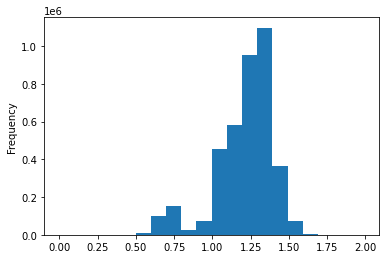

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
carburant['prix'].plot.hist(bins=20, ax=ax)

## Le mot-clé `groupby`

La distribution que nous voyons apparaître ne semble pas être naturelle (= gaussienne).  
Nous allons essayer de préciser un peu la distribution des prix.

`pandas` propose l'opération `groupby` qui s'applique bien aux colonnes qui représentent une catégorie (ici le type de carburant).

In [24]:
carburant.groupby('type')

In [25]:
carburant.groupby('type').get_group('SP98').head(5)

id                date  type   prix
492  1000001 2016-01-02 09:01:58  SP98  1.315
493  1000001 2016-01-04 10:01:35  SP98  1.315
494  1000001 2016-01-04 12:01:15  SP98  1.315
495  1000001 2016-01-05 09:01:12  SP98  1.315
496  1000001 2016-01-07 08:01:13  SP98  1.315

On pourra alors construire autant de sous-tableaux que de catégories.

<div class='alert alert-success'>
<b>Note</b>: Dans la ligne précédente, nous avons *chaîné* trois opérations qui chacune renvoyaient une vue ou un nouveau tableau pandas. La « philosophie pandas » se retrouve dans ces chaînages d'opérations qui peuvent atteindre 10 ou 20 opérations...
</div>

Pour notre besoin ici, on va profiter du fait que le type `DataFrameGroupBy` est itérable pour enchaîner élégamment les opérations :

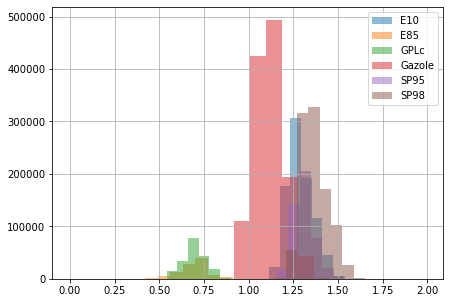

In [26]:
groups = carburant.groupby('type')['prix']  # on accède à la colonne `prix` pour toutes les catégories

fig, ax = plt.subplots(figsize=(7, 5))

for key, value in groups:
    value.hist(label=key, bins=20, alpha=.5, ax=ax)

ax.legend()

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Filtrer les lignes du tableau pour lesquelles le prix du carburant est inférieur à 0,4 €/L
</div>

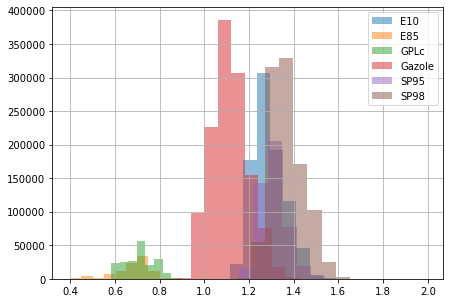

In [27]:
carburant = carburant[carburant['prix'] >= 0.4]
groups = carburant.groupby('type')['prix']  # on accède à la colonne `prix` pour toutes les catégories

fig, ax = plt.subplots(figsize=(7, 5))

for key, value in groups:
    value.hist(label=key, bins=20, alpha=.5, ax=ax)

ax.legend()

Pour aller un peu plus loin avec le mot-clé `groupby`:
 - on peut facilement enchaîner un `groupby` avec une opération standard (moyenne, nombre d'occurrences, etc.) ;
 - on peut appliquer un `groupby` sur plusieurs colonnes (*on y vient...*)

In [28]:
# ['prix'] renvoie une série
# [['prix']] renvoie un tableau à une colonne (avec pretty-print)
carburant.groupby('type')[['prix']].mean()

prix
type            
E10     1.288536
E85     0.696988
GPLc    0.708984
Gazole  1.115644
SP95    1.311948
SP98    1.368165

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Compter le nombre de lignes de mise à jour de prix par type de carburant.
</div>

In [29]:
carburant.groupby('type')[['date']].count()

date
type           
E10      864631
E85       97198
GPLc     191562
Gazole  1268460
SP95     467323
SP98    1002254

In [30]:
# %load solutions/count_maj.py
carburant.groupby('type')[['prix']].count()


prix
type           
E10      864631
E85       97198
GPLc     191562
Gazole  1268460
SP95     467323
SP98    1002254

## Ajout de nouvelles colonnes

Il existe plusieurs méthodes pour créer ou remplacer le contenu de colonnes d'un tableau.  
La méthode la plus sûre qui fonctionne toujours sans messages d'erreur ou d'avertissement est basée sur `assign`.

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Consulter l'aide de la méthode `assign`.
</div>

In [31]:
?carburant.assign

Signature: carburant.assign(**kwargs) -> 'DataFrame'
Docstring:
Assign new columns to a DataFrame.

Returns a new object with all original columns in addition to new ones.
Existing columns that are re-assigned will be overwritten.

Parameters
----------
**kwargs : dict of {str: callable or Series}
    The column names are keywords. If the values are
    callable, they are computed on the DataFrame and
    assigned to the new columns. The callable must not
    change input DataFrame (though pandas doesn't check it).
    If the values are not callable, (e.g. a Series, scalar, or array),
    they are simply assigned.

Returns
-------
DataFrame
    A new DataFrame with the new columns in addition to
    all the existing columns.

Notes
-----
Assigning multiple columns within the same ``assign`` is possible.
Later items in '\*\*kwargs' may refer to newly created or modified
columns in 'df'; items are computed and assigned into 'df' in order.

.. versionchanged:: 0.23.0

   Keyword argument 

In [32]:
# %load solutions/help_assign.py
?carburant.assign


Signature: carburant.assign(**kwargs) -> 'DataFrame'
Docstring:
Assign new columns to a DataFrame.

Returns a new object with all original columns in addition to new ones.
Existing columns that are re-assigned will be overwritten.

Parameters
----------
**kwargs : dict of {str: callable or Series}
    The column names are keywords. If the values are
    callable, they are computed on the DataFrame and
    assigned to the new columns. The callable must not
    change input DataFrame (though pandas doesn't check it).
    If the values are not callable, (e.g. a Series, scalar, or array),
    they are simply assigned.

Returns
-------
DataFrame
    A new DataFrame with the new columns in addition to
    all the existing columns.

Notes
-----
Assigning multiple columns within the same ``assign`` is possible.
Later items in '\*\*kwargs' may refer to newly created or modified
columns in 'df'; items are computed and assigned into 'df' in order.

.. versionchanged:: 0.23.0

   Keyword argument 

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Ajouter une colonne <code>month</code> qui donne le mois courant de la date mise à jour du tarif du carburant.
</div>

    ☞   Utiliser l'attribut month des datetime Python
    ☞   Éventuellement, rechercher de l'aide sur la méthode apply

In [33]:
# carburant['date'][0].month
carburant = carburant.assign(
    month = carburant['date'].apply(lambda x: x.month)
)
# carburant.head()


In [34]:
# %load solutions/assign_month.py
carburant = carburant.assign(
    month=carburant.date.apply(lambda x: x.month)
)


On reprend alors l'étude précédente mais on souhaite trouver le prix moyen par mois et par type de carburant.  
On passe alors deux arguments au `groupby`.

In [35]:
carburant.groupby(['type', 'month'])[['prix']].mean()

prix
type month          
E10  1      1.253778
     2      1.223730
     3      1.246452
     4      1.287975
     5      1.318833
...              ...
SP98 8      1.345634
     9      1.355860
     10     1.394103
     11     1.385927
     12     1.428818

[72 rows x 1 columns]

## Pivot ligne/colonne

Cette présentation de tableau étant peu lisible, `pandas` offre une opération qui transforme ce tableau 1D à deux index en tableau 2D. On choisit alors de passer le type de carburant en colonne :

In [36]:
carburant.groupby(['type', 'month'])['prix'].mean().unstack('type')

type        E10       E85      GPLc    Gazole      SP95      SP98
month                                                            
1      1.253778  0.706541  0.734588  1.030391  1.276375  1.334045
2      1.223730  0.707549  0.730897  1.025677  1.247471  1.304701
3      1.246452  0.706022  0.715762  1.070024  1.271541  1.322843
4      1.287975  0.704365  0.701004  1.075342  1.311497  1.363445
5      1.318833  0.703269  0.700497  1.138404  1.343185  1.395933
6      1.335300  0.698667  0.708548  1.162958  1.355511  1.415957
7      1.284877  0.693408  0.704738  1.126700  1.302576  1.366858
8      1.267789  0.698522  0.696947  1.109947  1.289698  1.345634
9      1.276242  0.692941  0.695377  1.117087  1.298223  1.355860
10     1.312734  0.689912  0.699520  1.165076  1.336919  1.394103
11     1.302255  0.684593  0.705867  1.155576  1.325926  1.385927
12     1.348422  0.684565  0.715150  1.208070  1.374967  1.428818

On peut alors facilement tracer cette l'évolution du prix du carburant en 2016, par type de carburant :

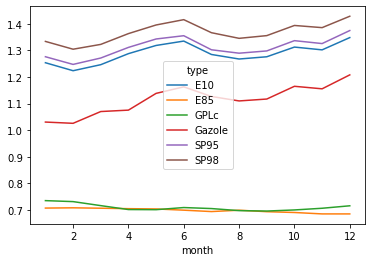

In [37]:
carburant.groupby(['type', 'month'])['prix'].mean().unstack('type').plot.line()

<div class='alert alert-warning'>
<b>À vous de jouer !</b> L'évolution du prix sur le graphe précédent étant un peu grossière, tracer le même graphe avec un point par semaine.
</div>

    ☞   Utiliser l'attribut week des datetime Python
    ☞   Pour éviter les recouvrements, donner le no. de semaine 0 aux jours de janvier de la semaine 53
    
<div class='alert alert-danger'>
</b>Avertissement</b> : si vous voyez un message sur fond rouge, lisez-le et faites bêtement ce qu'on vous demande. On reviendra dessus plus loin.
</div>

In [38]:
carburant = carburant.assign(
    week = carburant['date'].apply(lambda x: x.week)
)
carburant.loc[(carburant.week == 53) & (carburant.month == 1), 'week'] = 0

In [39]:
?carburant.loc

Type:        property
String form: <property object at 0x7f430bbe1590>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above)

See more at :ref:`Selection by Label <indexing.label>`

Raises
------
KeyError
    If any items are not found.

See Also
--------
DataF

In [40]:
# %load solutions/assign_week.py
carburant = carburant.assign(week=carburant.date.apply(lambda x: x.week))
carburant.loc[(carburant.week == 53) & (carburant.month == 1), 'week'] = 0


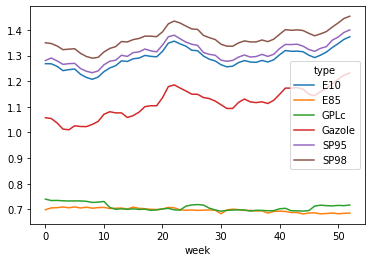

In [41]:
carburant.groupby(['type', 'week'])['prix'].mean().unstack('type').plot.line()

## Analyse en composantes principales

Poursuivons notre analyse de l'évolution des prix du carburant en nous concentrons sur un type de carburant en particulier.

Une des applications de l'analyse en composantes principales (PCA pour *Principal Component Analysis*) permet de projeter un vecteur de grande dimension sur une nombre de dimensions plus petit, sur lesquelles s'exprime la plus grande variance.

C'est un excellent outil de base pour visualiser d'éventuelles classes de comportements.

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Sélectionner les lignes du tableau correspondant au carburant SP98.
</div>

In [42]:
sp98 = carburant.loc[carburant.type == 'SP98']
sp98

id                date  type   prix  month  week
492       1000001 2016-01-02 09:01:58  SP98  1.315      1     0
493       1000001 2016-01-04 10:01:35  SP98  1.315      1     1
494       1000001 2016-01-04 12:01:15  SP98  1.315      1     1
495       1000001 2016-01-05 09:01:12  SP98  1.315      1     1
496       1000001 2016-01-07 08:01:13  SP98  1.315      1     1
...           ...                 ...   ...    ...    ...   ...
3894241  95870009 2016-12-27 00:12:00  SP98  1.427     12    52
3894242  95870009 2016-12-28 00:12:00  SP98  1.427     12    52
3894243  95870009 2016-12-29 00:12:00  SP98  1.427     12    52
3894244  95870009 2016-12-30 00:12:00  SP98  1.432     12    52
3894245  95870009 2016-12-31 00:12:00  SP98  1.439     12    52

[1002254 rows x 6 columns]

In [43]:
# %load solutions/sp98.py
sp98 = carburant[carburant.type=='SP98']


<div class='alert alert-warning'>
<b>À vous de jouer !</b> Créer un tableau du prix moyen du SP98 par semaine (ligne) et par station (colonne).
</div>

In [44]:
sp98_stats = sp98.groupby(['id', 'week'])['prix'].mean().unstack('id')
sp98_stats.head()

id    1000001   1000002   1000006   1000007   1000008   1000009   1000012   \
week                                                                         
0        1.315     1.318       NaN       NaN  1.300000     1.315  1.410000   
1        1.315     1.315    1.3175     1.315  1.315000       NaN  1.415714   
2        1.308     1.318    1.3000     1.294  1.301571     1.294  1.407143   
3        1.281     1.289    1.2810     1.279  1.280250     1.279  1.390000   
4        1.279     1.279       NaN       NaN  1.279000       NaN  1.390000   

id    1000013   1090001   1100002   ...  95640001  95650002  95712003  \
week                                ...                                 
0     1.326000       NaN       NaN  ...    1.3300  1.319000  1.422000   
1     1.326571  1.309000     1.304  ...       NaN  1.318429  1.429857   
2     1.307286  1.297667       NaN  ...    1.3085  1.309286  1.421571   
3     1.289143  1.289000     1.294  ...    1.2870  1.290857  1.404571   
4     1.289000  1.299000       NaN  ...    1.2915  1.298000  1.412857   

id    95712004  95740005  95800001  95800003  95800007  95870005  95870009  
week                                                                        
0     1.422000  1.316000  1.337000  1.324000       NaN       NaN  1.325000  
1     1.429857  1.314571  1.316667  1.319875       NaN       NaN  1.324714  
2     1.421571  1.305571  1.313000  1.313800       NaN       NaN  1.314143  
3     1.404571  1.290286       NaN  1.290364       NaN       NaN  1.295429  
4     1.412857  1.294286  1.306000  1.293333       NaN       NaN  1.303571  

[5 rows x 8135 columns]

In [45]:
# %load solutions/sp98_week.py
stats = sp98.groupby(['id', 'week'])['prix'].mean().unstack('id')
stats.head()


id    1000001   1000002   1000006   1000007   1000008   1000009   1000012   \
week                                                                         
0        1.315     1.318       NaN       NaN  1.300000     1.315  1.410000   
1        1.315     1.315    1.3175     1.315  1.315000       NaN  1.415714   
2        1.308     1.318    1.3000     1.294  1.301571     1.294  1.407143   
3        1.281     1.289    1.2810     1.279  1.280250     1.279  1.390000   
4        1.279     1.279       NaN       NaN  1.279000       NaN  1.390000   

id    1000013   1090001   1100002   ...  95640001  95650002  95712003  \
week                                ...                                 
0     1.326000       NaN       NaN  ...    1.3300  1.319000  1.422000   
1     1.326571  1.309000     1.304  ...       NaN  1.318429  1.429857   
2     1.307286  1.297667       NaN  ...    1.3085  1.309286  1.421571   
3     1.289143  1.289000     1.294  ...    1.2870  1.290857  1.404571   
4     1.289000  1.299000       NaN  ...    1.2915  1.298000  1.412857   

id    95712004  95740005  95800001  95800003  95800007  95870005  95870009  
week                                                                        
0     1.422000  1.316000  1.337000  1.324000       NaN       NaN  1.325000  
1     1.429857  1.314571  1.316667  1.319875       NaN       NaN  1.324714  
2     1.421571  1.305571  1.313000  1.313800       NaN       NaN  1.314143  
3     1.404571  1.290286       NaN  1.290364       NaN       NaN  1.295429  
4     1.412857  1.294286  1.306000  1.293333       NaN       NaN  1.303571  

[5 rows x 8135 columns]

In [46]:
from sklearn.decomposition import PCA

try:
    Xpca = PCA(n_components=2).fit_transform(stats.T)
except Exception as e:  # No real need to catch this, but the output is really long
    print('{}: {}'.format(type(e).__name__, e))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').


<div class='alert alert-warning'>
<b>À vous de jouer !</b> La PCA ne fonctionne pas pour des vecteurs contenant des <code>NaN</code>. Comment pourrait-on remplacer ces <code>NaN</code> par des valeurs ? Trouver la méthode appropriée dans la documentation de pandas et relancer l'analyse en composantes principales.
</div>

[[-0.42156867 -0.01570168]
 [-0.41635531 -0.01453281]
 [-0.26789095  0.01416246]
 ...
 [ 0.55376121 -0.21625832]
 [ 0.60202028 -0.22713949]
 [-0.19428259  0.02739709]]


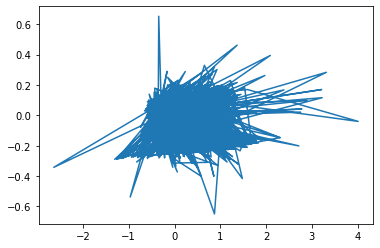

In [47]:
stats_filter = stats.fillna(method='ffill').fillna(method='bfill')
stats_filter.head()
Xpca = PCA(n_components=2).fit_transform(stats_filter.T)
print(Xpca)
fig, ax = plt.subplots()
ax.plot(Xpca[:, 0], Xpca[:, 1])

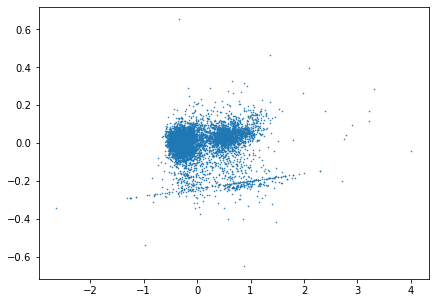

In [48]:
# %load solutions/pca.py
stats_filled = stats.fillna(method='ffill').fillna(method='bfill')
Xpca = PCA(n_components=2).fit_transform(stats_filled.T)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(Xpca[:, 0], Xpca[:, 1], s=.3)


<div class='alert alert-success'>
Sur cette représentation, on devine un nuage de points à deux bosses, mais les points qui s'alignent en haut de l'image semblent étranges.
</div>

On peut sélectionner grossièrement les indices des points pour lesquels $y < -0.2$

In [49]:
import numpy as np
idx_y = np.where(Xpca[:, 1] < -.2)[0]
idx_y

array([  35,   43,   47,  196,  246,  253,  254,  296,  297,  311,  312,
        322,  323,  326,  340,  343,  349,  355,  374,  431,  438,  439,
        464,  478,  643,  660,  677,  688,  712,  720,  727,  741,  769,
        772,  776,  777,  788,  796,  803,  819,  826,  829,  839,  851,
        855,  891,  896,  897,  908,  925,  974, 1020, 1021, 1092, 1099,
       1102, 1106, 1277, 1286, 1361, 1396, 1397, 1408, 1438, 1467, 1530,
       1628, 1677, 1781, 1785, 1842, 1941, 1973, 2011, 2053, 2109, 2136,
       2152, 2199, 2244, 2305, 2312, 2323, 2330, 2360, 2389, 2443, 2472,
       2581, 2652, 2685, 2693, 2695, 2794, 2804, 2896, 2961, 2969, 2993,
       3030, 3036, 3038, 3041, 3066, 3104, 3150, 3174, 3179, 3193, 3214,
       3219, 3238, 3302, 3325, 3371, 3372, 3381, 3400, 3404, 3423, 3443,
       3462, 3477, 3524, 3614, 3648, 3724, 3773, 3810, 3815, 3826, 3837,
       3938, 3961, 3963, 3971, 3974, 3999, 4019, 4020, 4072, 4074, 4102,
       4156, 4162, 4202, 4302, 4344, 4365, 4401, 44

On peut alors afficher le tableau `stats` construit précédemment uniquement pour les stations sélectionnées. Le mot-clé `iloc` permet d'indexer un tableau `pandas` comme on aurait indexé un tableau `numpy`.

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Afficher les premières lignes du tableau stats pour les stations <i>atypiques</i>. Proposer une interprétation pour ces stations qui ont été séparées du nuage de points.
</div>

In [50]:
stats.iloc[:, idx_y].head()

id    1250002   1320002   1340002   3290003   4170002   4210005   4260002   \
week                                                                         
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

id    5350001   5400002   6000030   ...  95230006  95310010  95320005  \
week                                ...                                 
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1          NaN     1.356       NaN  ...       NaN       NaN       NaN   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3          NaN       NaN       NaN  ...       NaN       NaN       NaN   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   

id    95370003  95520003  95540003  95570005  95570007  95800007  95870005  
week                                                                        
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 326 columns]

In [51]:
# %load solutions/pca_weird.py
stats.iloc[:, idx_y].head()


id    1250002   1320002   1340002   3290003   4170002   4210005   4260002   \
week                                                                         
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

id    5350001   5400002   6000030   ...  95230006  95310010  95320005  \
week                                ...                                 
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1          NaN     1.356       NaN  ...       NaN       NaN       NaN   
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3          NaN       NaN       NaN  ...       NaN       NaN       NaN   
4          NaN       NaN       NaN  ...       NaN       NaN       NaN   

id    95370003  95520003  95540003  95570005  95570007  95800007  95870005  
week                                                                        
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 326 columns]

Text(0.5, 0.98, 'Nombre de semaines à prix = NaN')

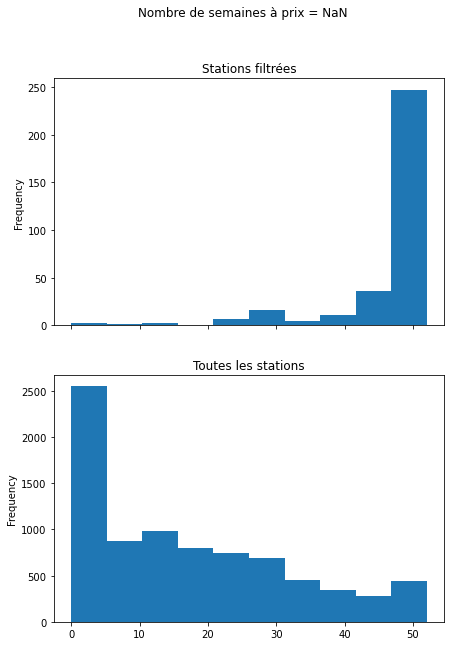

In [52]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(7, 10), sharex=True)

stats.iloc[:, idx_y].isnull().sum().plot.hist(ax=ax0)
stats.isnull().sum().plot.hist(ax=ax1)

ax0.set_title("Stations filtrées")
ax1.set_title("Toutes les stations")

fig.suptitle("Nombre de semaines à prix = NaN")

<div class='alert alert-success'>
On peut alors choisir de filtrer les stations qui n'ont plus de 10 semaines sans mise à jour de tarif.
</div>

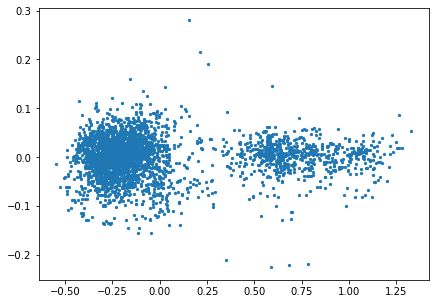

In [53]:
stats_filtered = stats_filled.loc[:,stats.isnull().sum() < 10]
Xpca = PCA(n_components=2).fit_transform(stats_filtered.T)

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(Xpca[:, 0], Xpca[:, 1], s=5)

<div class='alert alert-success'>
On peut maintenant essayer d'interpréter ces nuages de points en utilisant la couleur pour afficher une troisième dimension.
</div>

Le paramètre `cmap` prend le nom d'une [`colormap`](http://matplotlib.org/users/colormaps.html) (suivre le lien pour une liste de colormap par défaut).

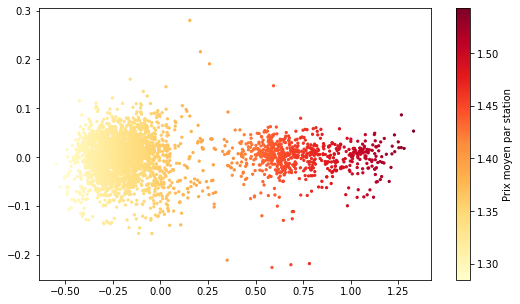

In [54]:
fig, ax = plt.subplots(figsize=(8.8, 5))
s = ax.scatter(Xpca[:, 0], Xpca[:, 1], s=5, c=stats_filtered.mean().values, cmap="YlOrRd")
fig.colorbar(s, label='Prix moyen par station')

## Jointures

Essayons à présent d'exploiter les informations présentes dans le second fichier.

In [55]:
stations = pd.read_csv('data/02-stations2016.csv')
stations.head()

id                     adresse    cp                  ville pop
0  1000001       596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R
1  1000002         16 Avenue de Marboz  1000        BOURG-EN-BRESSE   R
2  1000004  20 Avenue du Maréchal Juin  1000        Bourg-en-Bresse   R
3  1000005       642 Avenue de Trévoux  1000  SAINT-DENIS-LèS-BOURG   R
4  1000006    1 Boulevard John Kennedy  1000        BOURG-EN-BRESSE   R

Chaque ligne reprennent l'identifiant d'une station, commun avec le 1er fichier, puis donne l'adresse, le code postal (lu comme un entier) et la ville du fichier. La dernière colonne vaut `A` si la station service est sur une aire d'autoroute.

Pour manipuler les codes postaux, commençons par les écrire sous forme de chaîne de caractère de cinq chiffres (complétée par des zéros en tête).

In [56]:
stations = stations.assign(
    code_postal = stations.cp.apply(lambda x: "{:0>5}".format(x)))
stations.head()

id                     adresse    cp                  ville pop  \
0  1000001       596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R   
1  1000002         16 Avenue de Marboz  1000        BOURG-EN-BRESSE   R   
2  1000004  20 Avenue du Maréchal Juin  1000        Bourg-en-Bresse   R   
3  1000005       642 Avenue de Trévoux  1000  SAINT-DENIS-LèS-BOURG   R   
4  1000006    1 Boulevard John Kennedy  1000        BOURG-EN-BRESSE   R   

  code_postal  
0       01000  
1       01000  
2       01000  
3       01000  
4       01000

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Ajouter une colonne département avec les deux premiers chiffres du code postal (trois pour les DOM écrits sous la forme 97x).
</div>

In [57]:
carburant = carburant.assign(departement=stations.code_postal.apply(lambda x: x[:3] if x[:2] == '97' else x[:2]))
carburant.head()

id                date    type   prix  month  week departement
0  1000001 2016-01-02 09:01:58  Gazole  1.026      1     0          01
1  1000001 2016-01-04 10:01:35  Gazole  1.026      1     1          01
2  1000001 2016-01-04 12:01:15  Gazole  1.026      1     1          01
3  1000001 2016-01-05 09:01:12  Gazole  1.026      1     1          01
4  1000001 2016-01-07 08:01:13  Gazole  1.026      1     1          01

In [58]:
# %load solutions/departement.py
stations = stations.assign(
    departement=stations.code_postal.apply(
        lambda x: x[:3] if x[:2] == '97' else x[:2]
    )
)
stations.head()


id                     adresse    cp                  ville pop  \
0  1000001       596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R   
1  1000002         16 Avenue de Marboz  1000        BOURG-EN-BRESSE   R   
2  1000004  20 Avenue du Maréchal Juin  1000        Bourg-en-Bresse   R   
3  1000005       642 Avenue de Trévoux  1000  SAINT-DENIS-LèS-BOURG   R   
4  1000006    1 Boulevard John Kennedy  1000        BOURG-EN-BRESSE   R   

  code_postal departement  
0       01000          01  
1       01000          01  
2       01000          01  
3       01000          01  
4       01000          01

<div class='alert alert-success'>
On souhaite reprendre le nuage de points précédent pour afficher dans une couleur différente toutes les stations services présentes sur autoroute.  

<i>☞&emsp;On cherche une interprétation des nuages de points basée sur le fait qu'une station est sur autoroute ou non</i>
</div>

Il nous faut alors construire un vecteur issu de `stations['pop']` pour les stations présentes dans le nuage de points.  
Souvenez-vous qu'on a enlevé des stations "aberrantes"...

Voici une manière de faire :
- Nous avons vu ci-dessus l'opérateur `.iloc[]` pour sélectionner des cellules en fonction de leur position ;
- L'opérateur `.loc[]` fonctionne de la même manière avec l'**index** des lignes et le **nom** des colonnes.

Commençons alors par réindexer le tableau `stations` sur les identifiants :

In [59]:
stations.set_index('id').head()

adresse    cp                  ville pop  \
id                                                                     
1000001       596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R   
1000002         16 Avenue de Marboz  1000        BOURG-EN-BRESSE   R   
1000004  20 Avenue du Maréchal Juin  1000        Bourg-en-Bresse   R   
1000005       642 Avenue de Trévoux  1000  SAINT-DENIS-LèS-BOURG   R   
1000006    1 Boulevard John Kennedy  1000        BOURG-EN-BRESSE   R   

        code_postal departement  
id                               
1000001       01000          01  
1000002       01000          01  
1000004       01000          01  
1000005       01000          01  
1000006       01000          01

On va pouvoir alors l'associer aux colonnes de notre tableau `stats_filtered` :

In [60]:
stats_filtered.columns

Int64Index([ 1000001,  1000002,  1000006,  1000008,  1000012,  1000013,
             1100007,  1120004,  1120005,  1120007,
            ...
            95570003, 95600002, 95640001, 95650002, 95712003, 95712004,
            95740005, 95800001, 95800003, 95870009],
           dtype='int64', name='id', length=3220)

In [61]:
# Observer la colonne `id` pour constater qu'on a bien filtré des lignes...
stations.set_index('id').loc[stats_filtered.columns].head()

adresse    cp                  ville pop  \
id                                                                   
1000001     596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R   
1000002       16 Avenue de Marboz  1000        BOURG-EN-BRESSE   R   
1000006  1 Boulevard John Kennedy  1000        BOURG-EN-BRESSE   R   
1000008      Bd Charles de Gaulle  1000        BOURG-EN-BRESSE   R   
1000012    642, AVENUE DE TREVOUX  1000     ST DENIS LES BOURG   R   

        code_postal departement  
id                               
1000001       01000          01  
1000002       01000          01  
1000006       01000          01  
1000008       01000          01  
1000012       01000          01

On peut alors reprendre le nuage de points avec le paramètre `c` qui prend ici un vecteur de booléens :

Text(0.5, 0.98, 'Stations sur autoroute')

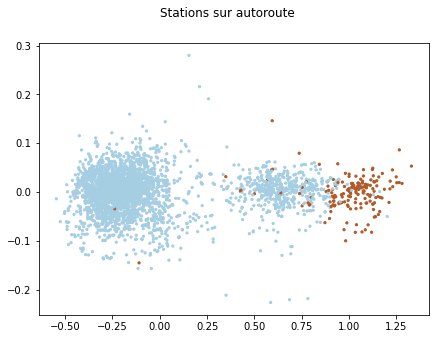

In [62]:
fig, ax = plt.subplots(figsize=(7, 5))
s = ax.scatter(Xpca[:, 0], Xpca[:, 1], s=5, cmap='Paired',
               c=(stations.set_index('id').loc[stats_filtered.columns]['pop'] == 'A').values)
fig.suptitle('Stations sur autoroute')

<div class='alert alert-danger'>
<b>Attention :</b> aucune corrélation claire se dessine sur ce graphe. On ne peut donc rien conclure de plus avec ce graphe, (à part que les stations services sur autoroute sont parmi les plus chères).
</div>

**Essayons autrement** : reprenons notre analyse en composantes principales en faisant une moyenne des prix des stations services sur un département.

Problème : les prix sont dans une table, les départements dans une autre. On souhaiterait rajouter une colonne dans notre tableau `sp98` avec le numéro du département de chaque station.

Une opération permet ceci : la **jointure** des bases de données est proposée sous la fonction `merge`. ([documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html))  
Elle prend notamment en paramètre le nom de la colonne sur laquelle se baser pour fusionner les deux tableaux.

In [63]:
sp98_dept = sp98.merge(stations, on='id')
sp98_dept.head()

id                date  type   prix  month  week  \
0  1000001 2016-01-02 09:01:58  SP98  1.315      1     0   
1  1000001 2016-01-04 10:01:35  SP98  1.315      1     1   
2  1000001 2016-01-04 12:01:15  SP98  1.315      1     1   
3  1000001 2016-01-05 09:01:12  SP98  1.315      1     1   
4  1000001 2016-01-07 08:01:13  SP98  1.315      1     1   

                 adresse    cp                  ville pop code_postal  \
0  596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R       01000   
1  596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R       01000   
2  596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R       01000   
3  596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R       01000   
4  596 AVENUE DE TREVOUX  1000  SAINT-DENIS-LèS-BOURG   R       01000   

  departement  
0          01  
1          01  
2          01  
3          01  
4          01

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Faire une nouvelle analyse par composantes principales avec un point par département.
</div>

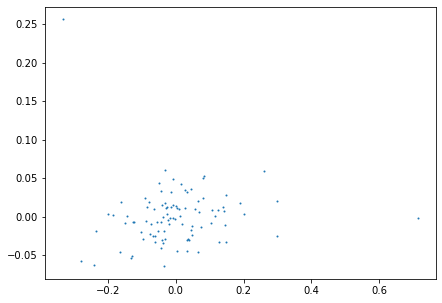

In [71]:
sp98_dept_stats = sp98_dept.groupby(['departement', 'week'])['prix'].mean().unstack('departement')
sp98_dept_stats = sp98_dept_stats.fillna(method='ffill').fillna(method='bfill')
sp98_dept_stats.head()
Xpca = PCA(n_components=2).fit_transform(sp98_dept_stats.T)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(Xpca[:, 0], Xpca[:, 1], s=1)

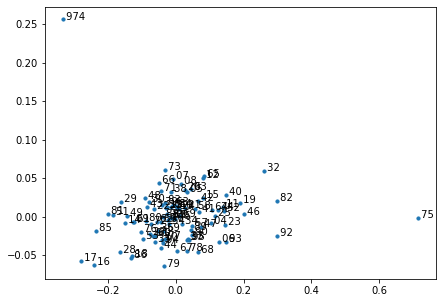

In [65]:
# %load solutions/pca_departement.py
sp98_dept_filled = (  # adding brackets is nice to chain methods and pretty-print
    sp98_dept
    .groupby(['departement', 'week'])
    ['prix']
    .mean()
    .unstack('departement')
    .fillna(method='ffill')
    .fillna(method='bfill')
)

Xpca = PCA(n_components=2).fit_transform(sp98_dept_filled.T)

plt.figure(figsize=(7, 5))
points = plt.scatter(Xpca[:, 0], Xpca[:, 1], s=10)
for (x, y), name in zip(Xpca, sp98_dept_filled.columns):
    plt.annotate(" {}".format(name), (x,y),)


<div class='alert alert-success'>
<b>Analyse</b> – Quelques départements se démarquent du nuage de point : Paris (75), les trois départements 32, 82 et 92 (dans une moindre mesure) et la Réunion (974) pour une raison probablement différente.
</div>

Essayons de comprendre pourquoi :

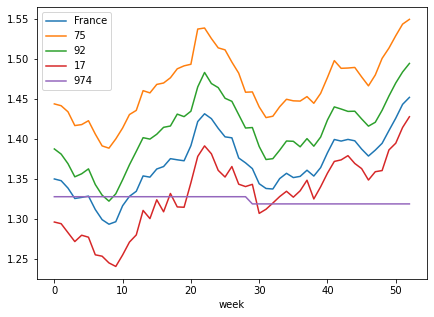

In [66]:
fig, ax = plt.subplots(figsize=(7, 5))
sp98_dept_filled.mean(axis=1).plot(label='France', ax=ax)
sp98_dept_filled['75 92 17 974'.split()].plot(ax=ax)
plt.legend()

<div class="alert alert-warning">
<b>À vous de jouer !</b> On devine que l'axe des abcisses est encore une fois corrélé au prix moyen par département.
<br /> Essayer une interprétation pour l'axe des ordonnées.
</div>

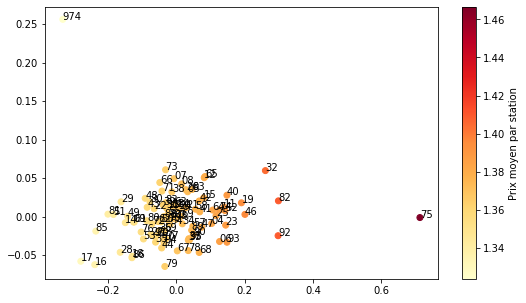

In [67]:
fig, ax = plt.subplots(figsize=(8.8, 5))
points = plt.scatter(*Xpca.T, c=sp98_dept_filled.mean(), cmap='YlOrRd')
for (x, y), name in zip(Xpca, sp98_dept_filled.columns):
    plt.annotate(name, (x,y))
plt.colorbar(label='Prix moyen par station')


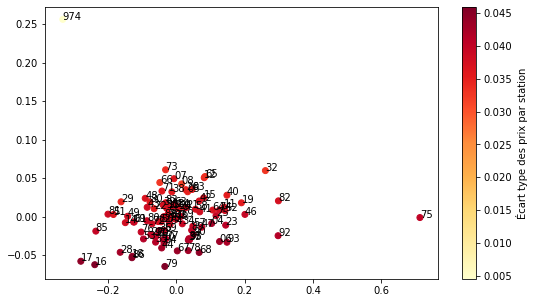

In [74]:
fig, ax = plt.subplots(figsize=(8.8, 5))
points = plt.scatter(*Xpca.T, c=sp98_dept_filled.std(), cmap='YlOrRd')
for (x, y), name in zip(Xpca, sp98_dept_filled.columns):
    plt.annotate(name, (x,y))
plt.colorbar(label='Écart type des prix par station')


In [73]:
%load solutions/y_axis.py


<div class="alert alert-danger">
<b>Attention</b> au biais que peut causer le choix des couleurs sur l'interprétation !
</div>

## Un petit dernier pour la route

<div class='alert alert-warning'>
<b>À vous de jouer !</b> Voici une carte de France.<br />
Colorer chaque département en fonction du prix moyen du carburant dans les stations services présentes sur son territoire.
</div>

(6100000.0, 7150000.0)

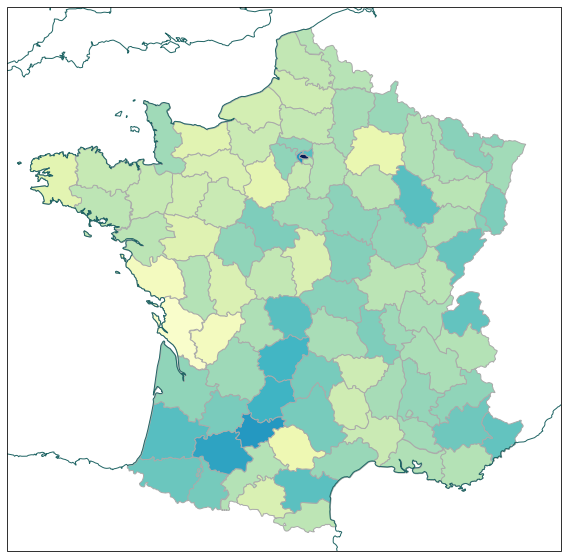

In [127]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from shapely.geometry import Polygon

lambert93 = ccrs.LambertConformal(
    3, 46.5,
    standard_parallels=(44, 49),
    false_easting=700000,
    false_northing=6600000
)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=lambert93)

admin1_file = shpreader.natural_earth(
    resolution='10m',
    category='cultural',
    name='admin_1_states_provinces'
)

shapes = {
    r.attributes['gn_a1_code'][3:]: [r.geometry]
    if type(r.geometry) == Polygon else r.geometry
    for r in shpreader.Reader(admin1_file).records()
    if r.attributes['adm0_a3'] == 'FRA'
    and r.attributes['gn_a1_code'][:2] == 'FR'
}

colormap = plt.cm.YlGnBu 

average_dept = sp98_dept_stats.mean()
norm_dept = plt.Normalize(average_dept.min(axis=0), average_dept.max(axis=0))


for index, dept in enumerate(shapes):
    if dept in average_dept:
        ax.add_geometries(
            shapes[dept],
            ccrs.PlateCarree(), 
            edgecolor="#aaaaaa",
            facecolor=colormap(norm_dept(average_dept.get(dept)))
        )
    
ax.coastlines('10m', color="#226666")

ax.set_xlim((80000, 1150000))
ax.set_ylim((6100000, 7150000))

In [125]:
sp98_dept_stats.mean().head()

print(sp98_dept_stats.mean())
print(974 in sp98_dept_filled.mean())
print(sp98_dept_filled.mean().get("02"))
average_dept = sp98_dept_filled.mean()
norm_dept = plt.Normalize(average_dept.min(axis=0), average_dept.max(axis=0))
print(norm_dept)

departement
01     1.366467
02     1.367545
03     1.374896
04     1.382281
05     1.373060
         ...   
92     1.409334
93     1.388715
94     1.363324
95     1.373688
974    1.323925
Length: 95, dtype: float64
False
1.3675449510085917


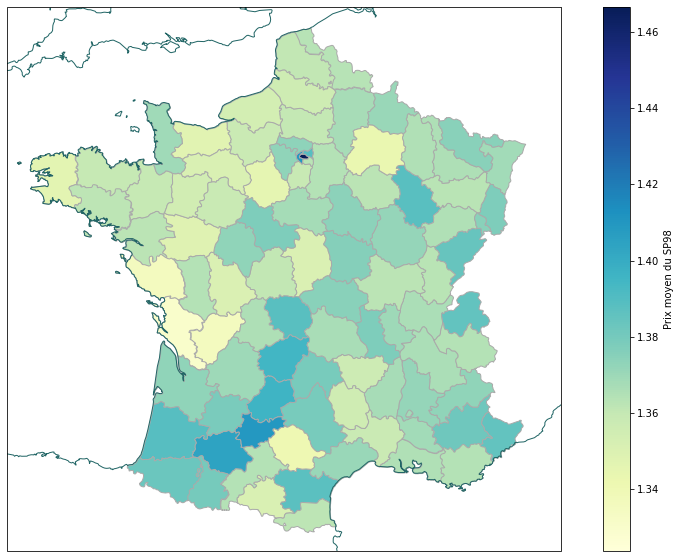

In [129]:
# %load solutions/plot_map.py
colormap = plt.cm.YlGnBu  # choose your favourite one!

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=lambert93)

X = sp98_dept_filled.mean()
norm = plt.Normalize(X.min(axis=0), X.max(axis=0))

for dept, value in zip(X.index[:-1], X):
    if dept not in ["20", "974"]:  # On omet la Corse et la Réunion...
        ax.add_geometries(
            shapes[dept],
            ccrs.PlateCarree(),
            edgecolor="#aaaaaa",
            facecolor=colormap(norm(value)),
        )

ax.coastlines("10m", color="#226666")

ax.set_xlim((80000, 1150000))
ax.set_ylim((6100000, 7150000))

mappable = plt.cm.ScalarMappable(norm, colormap)
mappable.set_array(X)
fig.colorbar(mappable, label="Prix moyen du SP98")


In [ ]:
# Keep this last one for home!
# %load solutions/plot_bonus.py